# Data preprocessing for Random Forest

In [1]:
import pandas as pd
import numpy as np

In [ ]:
df_rf = pd.read_csv('Datasets - DatasetRF.csv')

In [ ]:
df_rf

,AgeCategory,Sex,Year,TotalPopulation,Infected,Dead
0,0-1,M,2007,46 650 000,15,2
1,1-4,M,2007,46 650 000,113,0
2,5-9,M,2007,46 650 000,107,1
3,10-14,M,2007,46 650 000,99,1
4,15-17,M,2007,46 650 000,300,1
...,...,...,...,...,...,...
347,25-34,F,2022,41 167 000,753,63
348,35-44,F,2022,41 167 000,1119,134
349,45-54,F,2022,41 167 000,952,121
350,55-64,F,2022,41 167 000,644,79


In [ ]:
df_rf.dtypes

AgeCategory        object
Sex                object
Year                int64
TotalPopulation    object
Infected           object
Dead                int64
dtype: object

In [6]:
def clean_spaces(col):
    return int(str(col).replace('\xa0', '').replace(' ', ''))

In [ ]:
df_rf['TotalPopulation'] = df_rf['TotalPopulation'].map(clean_spaces)

In [ ]:
df_rf['Infected'] = df_rf['Infected'].map(clean_spaces)

In [ ]:
df_rf.astype({
    'AgeCategory': 'string',
    'Sex': 'string'
    })

,AgeCategory,Sex,Year,TotalPopulation,Infected,Dead
0,0-1,M,2007,46650000,15,2
1,1-4,M,2007,46650000,113,0
2,5-9,M,2007,46650000,107,1
3,10-14,M,2007,46650000,99,1
4,15-17,M,2007,46650000,300,1
...,...,...,...,...,...,...
347,25-34,F,2022,41167000,753,63
348,35-44,F,2022,41167000,1119,134
349,45-54,F,2022,41167000,952,121
350,55-64,F,2022,41167000,644,79


In [ ]:
df_rf.dtypes

AgeCategory        object
Sex                object
Year                int64
TotalPopulation     int64
Infected            int64
Dead                int64
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder_sex = LabelEncoder()
label_encoder_age = LabelEncoder()

# Encode 'Sex' column
df_rf['Sex'] = label_encoder_sex.fit_transform(df_rf['Sex'])

# Encode 'AgeCategory' column
df_rf['AgeCategory'] = label_encoder_age.fit_transform(df_rf['AgeCategory'])

In [ ]:
df_rf

,AgeCategory,Sex,Year,TotalPopulation,Infected,Dead
0,0,1,2007,46650000,15,2
1,1,1,2007,46650000,113,0
2,8,1,2007,46650000,107,1
3,2,1,2007,46650000,99,1
4,3,1,2007,46650000,300,1
...,...,...,...,...,...,...
347,5,0,2022,41167000,753,63
348,6,0,2022,41167000,1119,134
349,7,0,2022,41167000,952,121
350,9,0,2022,41167000,644,79


In [ ]:
# Check for null values in all columns
null_values = df_rf.isnull().sum()
null_values

AgeCategory        0
Sex                0
Year               0
TotalPopulation    0
Infected           0
Dead               0
dtype: int64

In [ ]:
def min_max_normalize(column):
    # Calculate the mean and standard deviation of the column
    min_val = column.min()
    max_val = column.max()

    # Normalize the column values
    normalized_column = (column - min_val) / (max_val - min_val)

    return normalized_column

# Select the columns you want to normalize
columns_to_normalize = ['TotalPopulation', 'Infected', 'Dead']

# Normalize the selected columns
for column_name in columns_to_normalize:
    df_rf[column_name] = min_max_normalize(df_rf[column_name])


In [ ]:
df_rf

,AgeCategory,Sex,Year,TotalPopulation,Infected,Dead
0,0,1,2007,1.0,0.001458,0.000683
1,1,1,2007,1.0,0.015743,0.000000
2,8,1,2007,1.0,0.014869,0.000342
3,2,1,2007,1.0,0.013703,0.000342
4,3,1,2007,1.0,0.043003,0.000342
...,...,...,...,...,...,...
347,5,0,2022,0.0,0.109038,0.021524
348,6,0,2022,0.0,0.162391,0.045781
349,7,0,2022,0.0,0.138047,0.041339
350,9,0,2022,0.0,0.093149,0.026990


In [ ]:
df_rf.describe()

,AgeCategory,Sex,Year,TotalPopulation,Infected,Dead
count,352.000000,352.000000,352.000000,352.000000,352.000000,352.000000
mean,5.000000,0.500000,2014.500000,0.631820,0.188555,0.087830
std,3.166779,0.500712,4.616334,0.250223,0.243723,0.161704
min,0.000000,0.000000,2007.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,2010.750000,0.474284,0.011771,0.000342
50%,5.000000,0.500000,2014.500000,0.670801,0.098980,0.011104
75%,8.000000,1.000000,2018.250000,0.803028,0.282143,0.084301
max,10.000000,1.000000,2022.000000,1.000000,1.000000,1.000000


<Axes: >

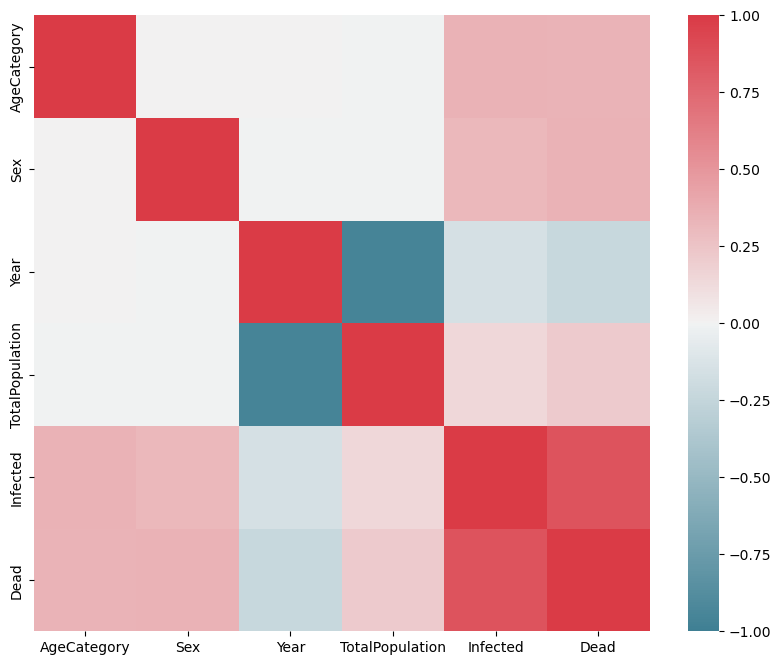

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df_rf.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Separate features and target variable
features = ['AgeCategory', 'Sex', 'Year', 'TotalPopulation', 'Dead']
target = 'Infected'

X = df_rf[features]  # Features
y = df_rf[target]     # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [ ]:
# Create the Random Forest Regression model
model = RandomForestRegressor(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set (Year can be adjusted here)
predicted = model.predict(X_test)

In [ ]:
# Now, to predict for the next year:
next_year_data = X_test.copy()
next_year_data['Year'] = next_year_data['Year'].iloc[-1] + 1  # Update year for prediction
# Predict for the next year data
next_year_predictions = model.predict(next_year_data)
# Analyze predictions:
# Look for the highest predicted number of deaths (considering prediction uncertainty)
highest_infected_index = np.argmax(next_year_predictions)
most_vulnerable_sample = next_year_data.iloc[highest_infected_index]

# Extract AgeCategory and Sex from the sample
predicted_age_category = most_vulnerable_sample['AgeCategory']
predicted_sex = most_vulnerable_sample['Sex']
decoded_labels_sex = label_encoder_sex.inverse_transform([int(predicted_sex)])
decoded_labels_age = label_encoder_age.inverse_transform([int(predicted_age_category)])
# Print results (consider confidence intervals for better understanding)
print(f"Based on the model, the group with the highest predicted number of deaths in year {next_year_data['Year'].iloc[0]} is:")
print(f"Age Category: {decoded_labels_age[0]}")
print(f"Sex: {decoded_labels_sex[0]}")

Based on the model, the group with the highest predicted number of deaths in year 2023 is:
Age Category: 35-44 
Sex: M


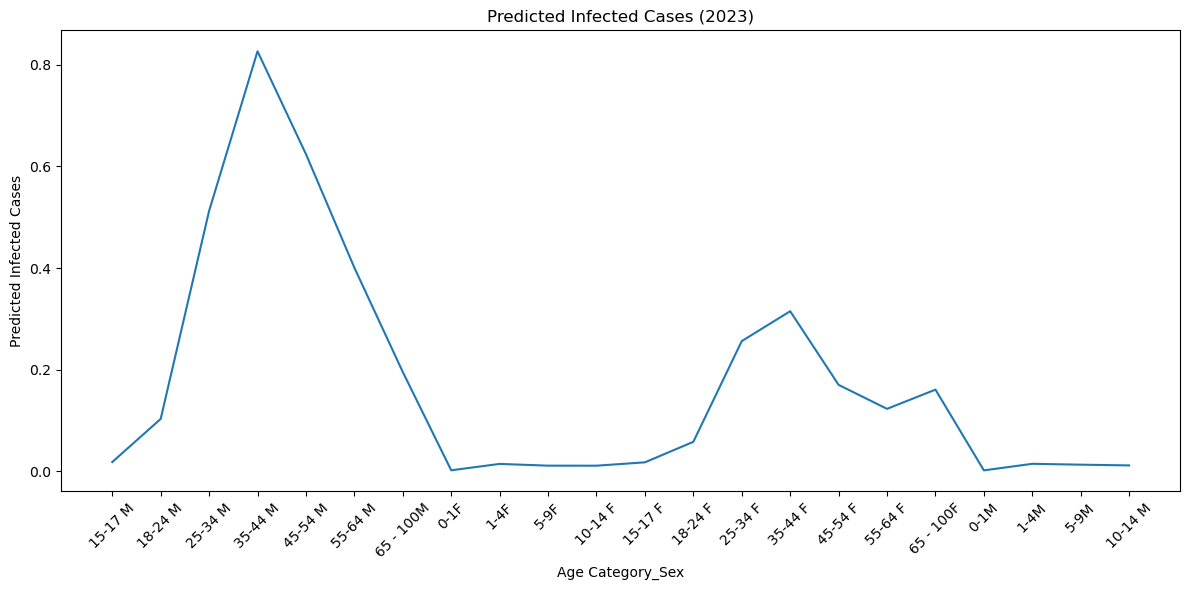

In [ ]:
x_labels = []

for i in range(len(next_year_predictions[:22])):
    sex = next_year_data.iloc[i]['Sex']
    age = next_year_data.iloc[i]['AgeCategory']

    x_labels.append(str(label_encoder_age.inverse_transform([int(age)])[0]) + str(label_encoder_sex.inverse_transform([int(sex)])[0]))

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(next_year_predictions[:22])  # Assuming numerical values in next_year_predictions
plt.xticks(range(len(next_year_predictions[:22])), x_labels, rotation=45)  # Set x-axis labels and rotate for readability
plt.xlabel("Age Category_Sex")
plt.ylabel("Predicted Infected Cases")
plt.title("Predicted Infected Cases (2023)")
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate model performance
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared: {r2}")

Mean Squared Error (MSE): 0.0028440307441931815
R-squared: 0.9204798828368166


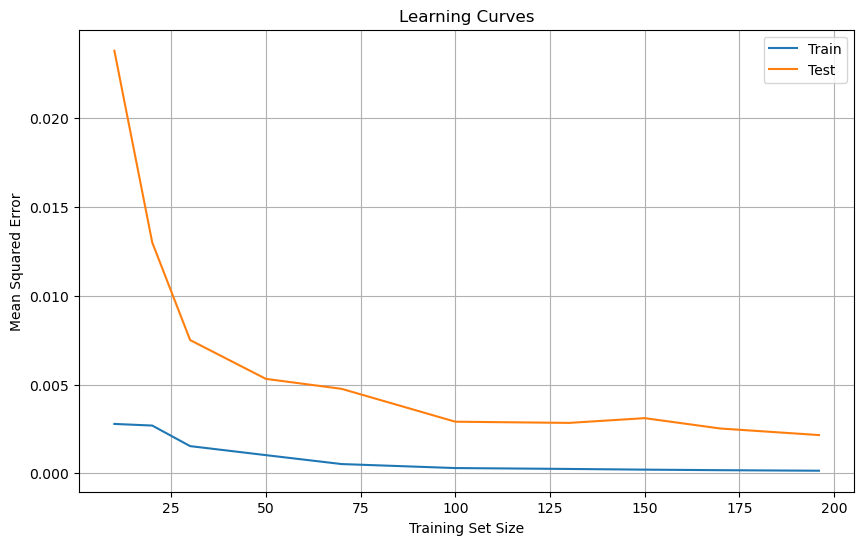

In [ ]:
from sklearn.model_selection import learning_curve

# Define a function to calculate MSE for different training set sizes
def plot_learning_curve(model, X, y, train_sizes, cv=None, scoring='neg_mean_squared_error'):
        train_sizes, train_scores, test_scores = learning_curve(model,
                                                                X,
                                                                y,
                                                                train_sizes=train_sizes,
                                                                cv=5,
                                                                scoring=scoring,
                                                                shuffle=True)
        train_scores_mean = -np.mean(train_scores, axis=1)
        test_scores_mean = -np.mean(test_scores, axis=1)

        plt.figure(figsize=(10, 6))
        plt.plot(train_sizes, train_scores_mean, label='Train')
        plt.plot(train_sizes, test_scores_mean, label='Test')
        plt.xlabel('Training Set Size')
        plt.ylabel('Mean Squared Error')
        plt.title('Learning Curves')
        plt.legend()
        plt.grid(True)
        plt.show()


# Define training set sizes
train_sizes = [10, 20, 30, 50, 70, 100, 130, 150, 170, 196]

# Plot learning curve for MSE
plot_learning_curve(model=model, X=X_train, y=y_train, train_sizes=train_sizes)

# Data preprocessing for SIR

In [2]:
df_sir = pd.read_csv("Datasets - DatasetSIR.csv")

In [3]:
df_sir

,Year,InfectedTB,DeadTB,Region,TotalPopulation,RecoveredTB
0,2007,3936,483,AR Crimea,46 650 000,1658
1,2007,2494,214,Vinnytsia,46 650 000,1095
2,2007,2164,263,Volyn,46 650 000,913
3,2007,9468,1050,Dnipropetrovsk,46 650 000,4041
4,2007,11004,1476,Donetsk,46 650 000,4574
...,...,...,...,...,...,...
411,2022,441,50,Khmelnytskyi,1 225 666,188
412,2022,419,95,Cherkasy,1 157 115,156
413,2022,406,42,Chernivtsi,887 392,175
414,2022,469,78,Chernihiv,950 773,188


In [4]:
df_sir.dtypes

Year                int64
InfectedTB         object
DeadTB              int64
Region             object
TotalPopulation    object
RecoveredTB         int64
dtype: object

In [7]:
df_sir['TotalPopulation'] = df_sir['TotalPopulation'].map(clean_spaces)
df_sir['InfectedTB'] = df_sir['InfectedTB'].map(clean_spaces)
df_sir['Region'] = df_sir['Region'].astype('string')

In [8]:
df_sir.dtypes

Year                int64
InfectedTB          int64
DeadTB              int64
Region             string
TotalPopulation     int64
RecoveredTB         int64
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder_region = LabelEncoder()

df_sir['Region'] = label_encoder_region.fit_transform(df_sir['Region'])
df_sir

,Year,InfectedTB,DeadTB,Region,TotalPopulation,RecoveredTB
0,2007,3936,483,0,46650000,1658
1,2007,2494,214,21,46650000,1095
2,2007,2164,263,22,46650000,913
3,2007,9468,1050,4,46650000,4041
4,2007,11004,1476,5,46650000,4574
...,...,...,...,...,...,...
411,2022,441,50,9,1225666,188
412,2022,419,95,1,1157115,156
413,2022,406,42,3,887392,175
414,2022,469,78,2,950773,188


In [10]:
# # Select the columns you want to normalize
# columns_to_normalize = ['InfectedTB', 'DeadTB', 'TotalPopulation', 'RecoveredTB']

# # Normalize the selected columns
# for column_name in columns_to_normalize:
#     df_sir[column_name] = min_max_normalize(df_sir[column_name])

# df_sir

In [11]:
df_sir.describe()

,Year,InfectedTB,DeadTB,Region,TotalPopulation,RecoveredTB
count,416.000000,416.000000,416.000000,416.000000,4.160000e+02,416.000000
mean,2014.500000,1864.346154,216.125000,12.500000,4.214824e+07,791.617788
std,4.615323,1552.751736,192.801537,7.509031,1.057650e+07,660.618776
min,2007.000000,0.000000,0.000000,0.000000,0.000000e+00,-32.000000
25%,2010.750000,844.500000,101.500000,6.000000,4.376750e+07,347.250000
50%,2014.500000,1473.000000,157.500000,12.500000,4.484500e+07,630.000000
75%,2018.250000,2354.500000,256.250000,19.000000,4.557000e+07,1022.750000
max,2022.000000,11004.000000,1476.000000,25.000000,4.665000e+07,4574.000000


<Axes: >

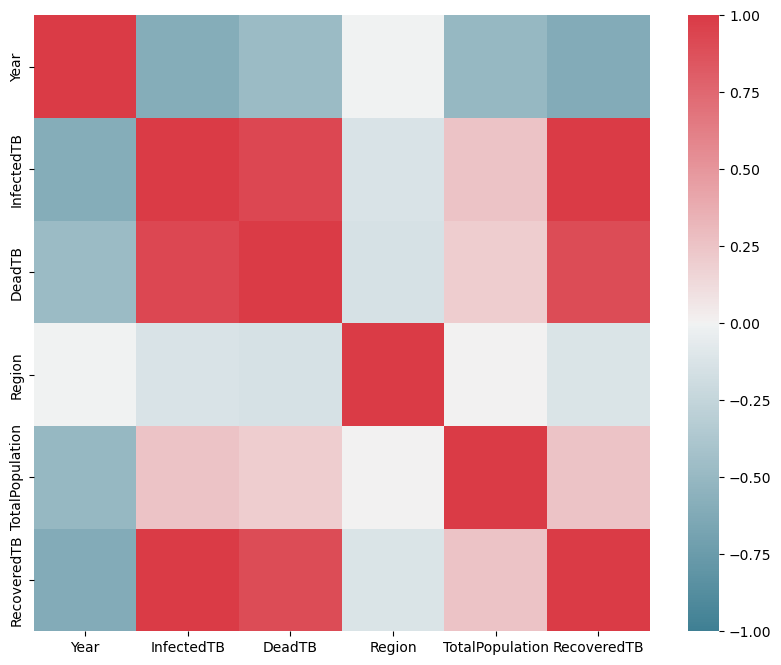

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(10, 8))
corr = df_sir.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

In [15]:
# Check for null values in all columns
null_values = df_sir.isnull().sum()
null_values

Year               0
InfectedTB         0
DeadTB             0
Region             0
TotalPopulation    0
RecoveredTB        0
dtype: int64

# SIR

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def run_for_region(region, total_population, total_infected, total_recovered, total_dead, total_days):
    def dAdt(A, t, beta, gamma, N):
        S= A[0]
        I = A[1]
        R = A[2]
        return [
            -beta/N * S * I,
            beta/N * S * I - gamma * I,
            gamma*I
        ]

    times = np.arange(0, total_days, 2)
    gamma = 1/10
    N = total_population
    beta = 0.4
    S0, I0, R0 = N - total_infected - total_recovered - total_dead, total_infected, total_dead + total_recovered
    sol = odeint(dAdt, y0=[S0, I0, R0], t=times, args=(beta, gamma, N))

    S = sol.T[0]
    I = sol.T[1]
    R = sol.T[2]

    max_infected = np.max(I)
    # print(f"Maximum number of infected people in {total_days} days for region {region}: {max_infected}")

    max_infected_percentage = max_infected / total_population * 100


    plt.figure(figsize=(14, 7))
    plt.title(label=f'Modeling for the 700 days for region with {region} as center(in thousands)')
    plt.plot(times, S / 1000, label='Susceptible')
    plt.plot(times, I / 1000, label='Infected')
    plt.plot(times, R / 1000, label='Recovered/Dead')
    plt.legend()
    plt.grid()

    # Save the plot as a JPG file
    plt.savefig(f'../SIR_Results/{region}_prediction.jpg')

    return (region, max_infected_percentage)

Maximum number of infected people in 700 days for region Vinnytsia: 601550.6920225001
Maximum number of infected people in 700 days for region Volyn: 410655.8284692569
Maximum number of infected people in 700 days for region Dnipropetrovsk: 1247440.907107606
Maximum number of infected people in 700 days for region Donetsk: 759919.261107705
Maximum number of infected people in 700 days for region Zhytomyr: 475836.0039055366
Maximum number of infected people in 700 days for region Zakarpattia: 500341.9050856078
Maximum number of infected people in 700 days for region Zaporizhzhia: 658908.767871492
Maximum number of infected people in 700 days for region Ivano-Frankivsk: 542736.8323586936
Maximum number of infected people in 700 days for region Kyiv: 720907.371618818
Maximum number of infected people in 700 days for region Kirovohrad: 361212.40342359163
Maximum number of infected people in 700 days for region Luhansk: 268776.43093700235
Maximum number of infected people in 700 days for re

C:\Users\rabot\AppData\Local\Temp\ipykernel_7064\2918568264.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 7))


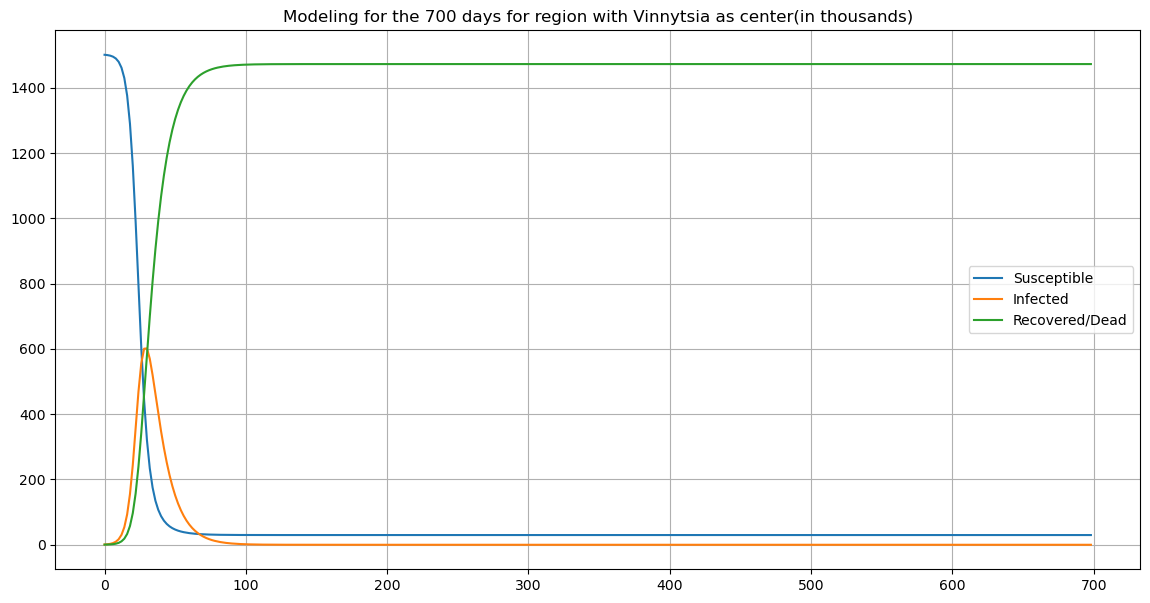

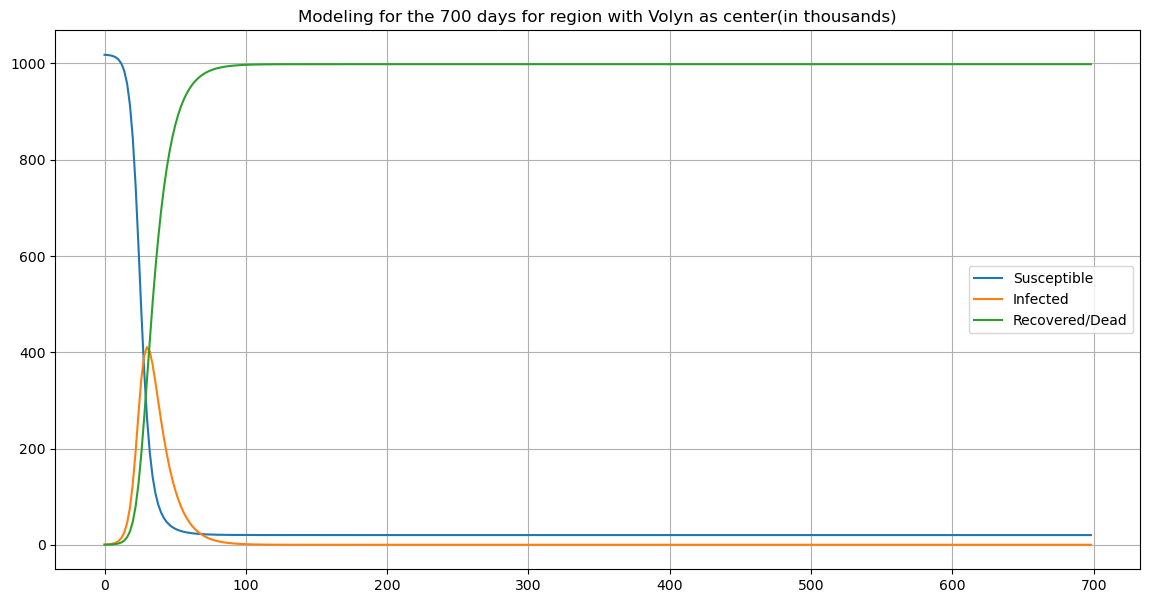

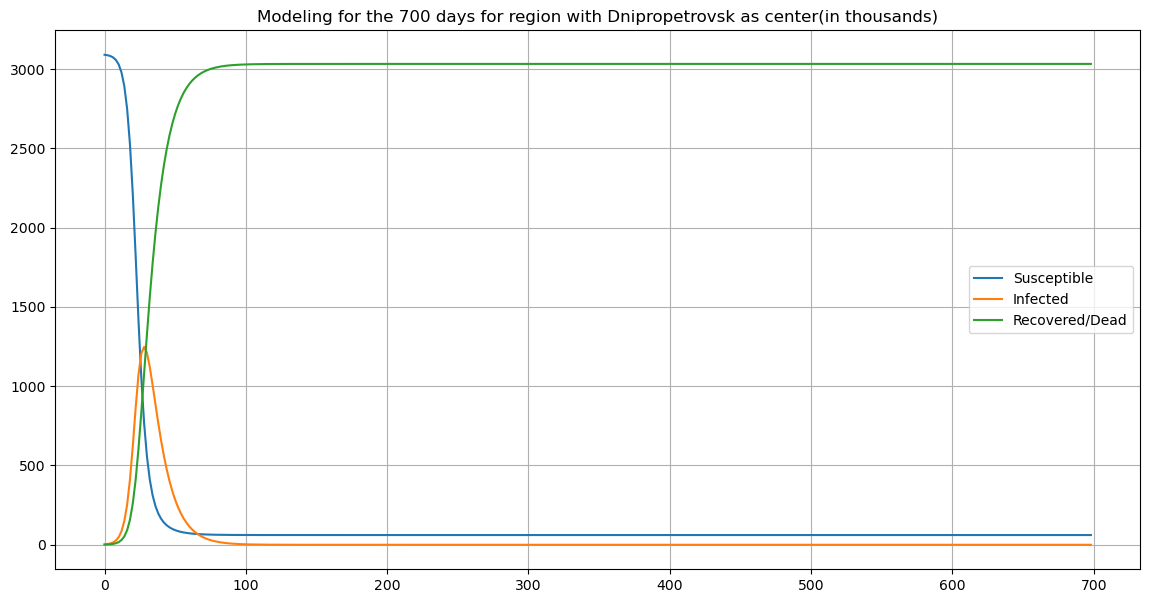

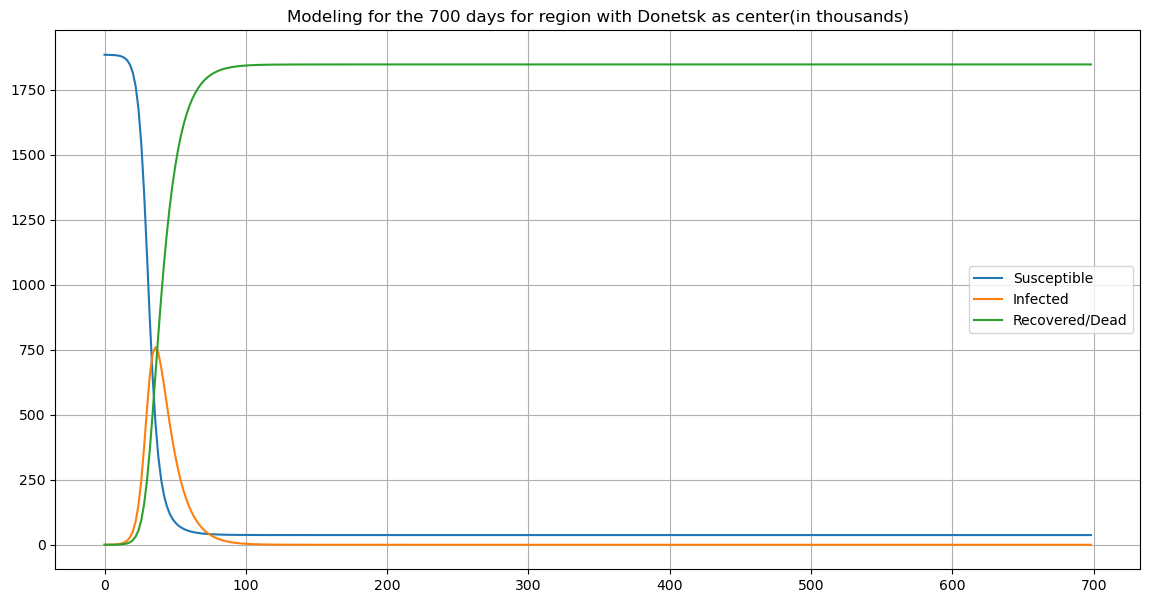

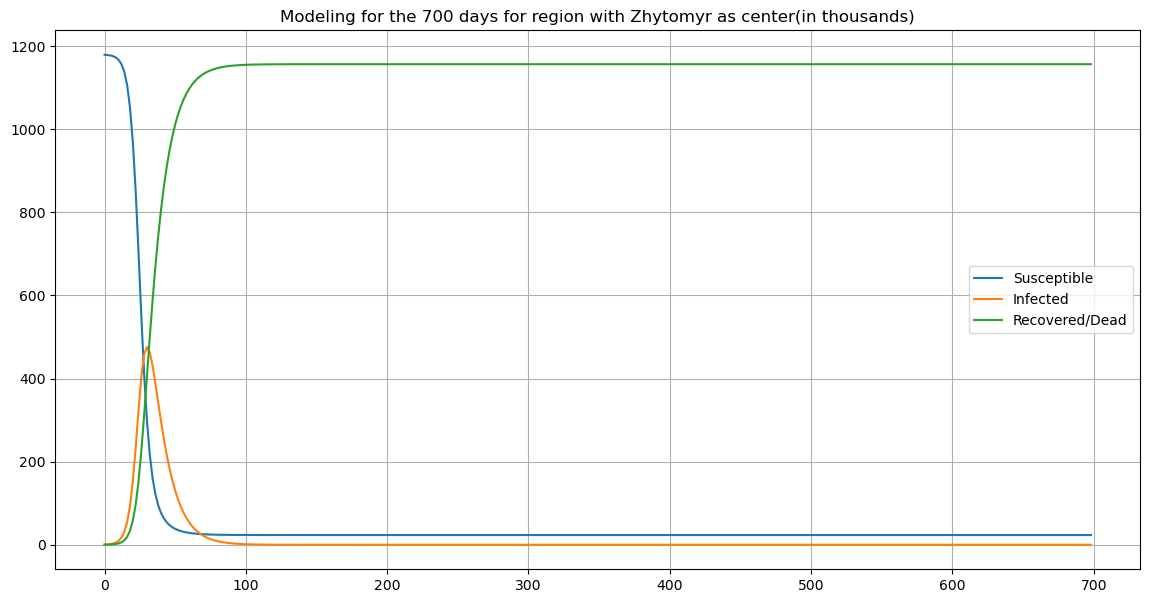

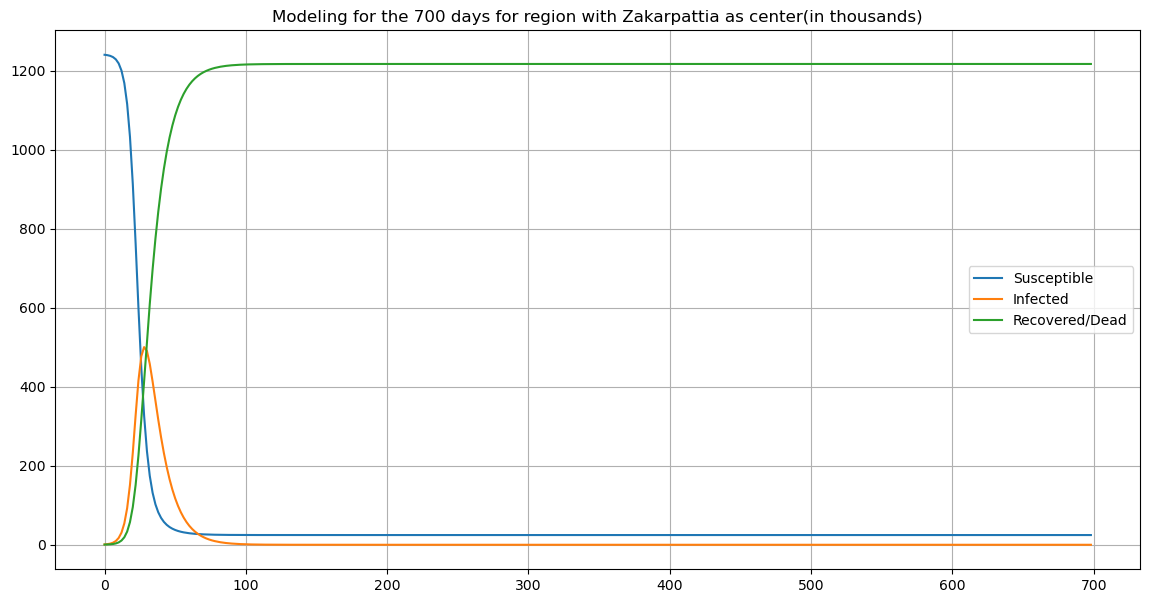

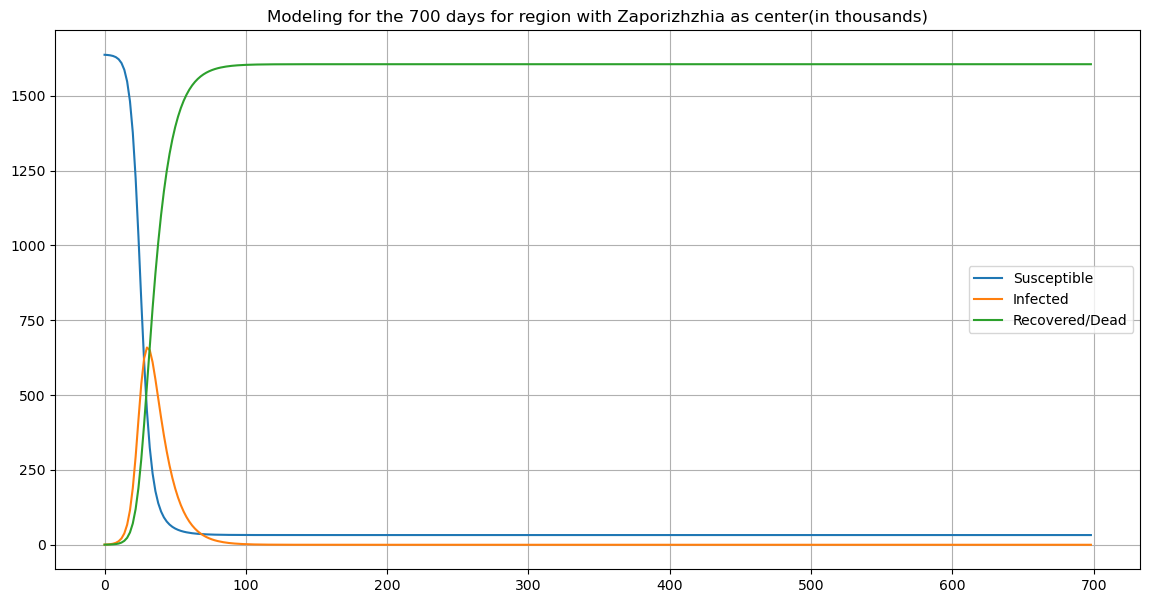

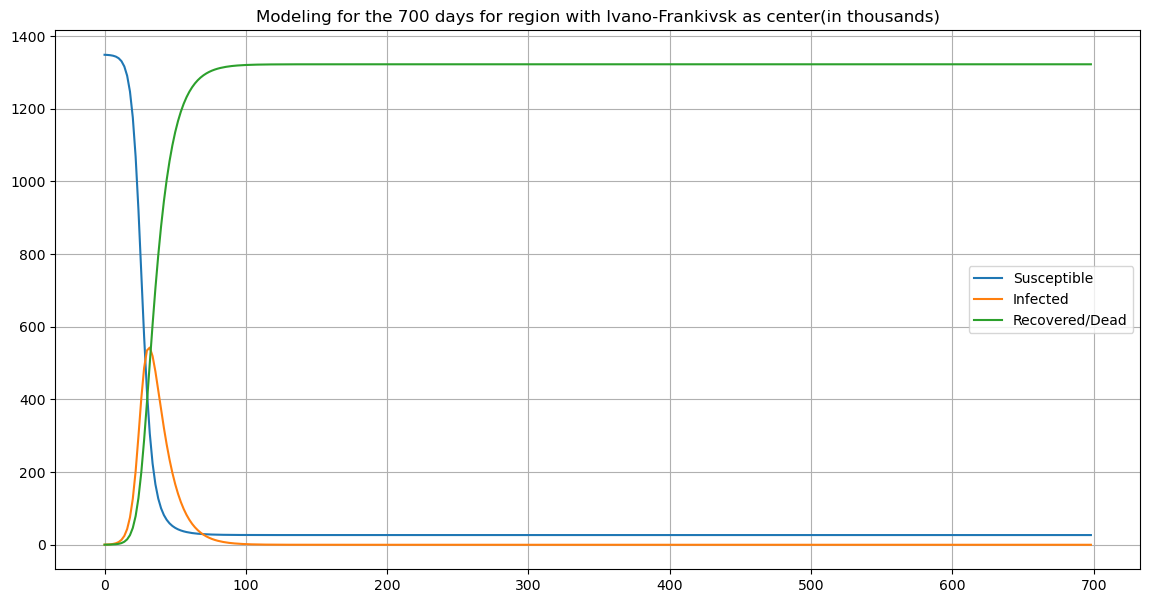

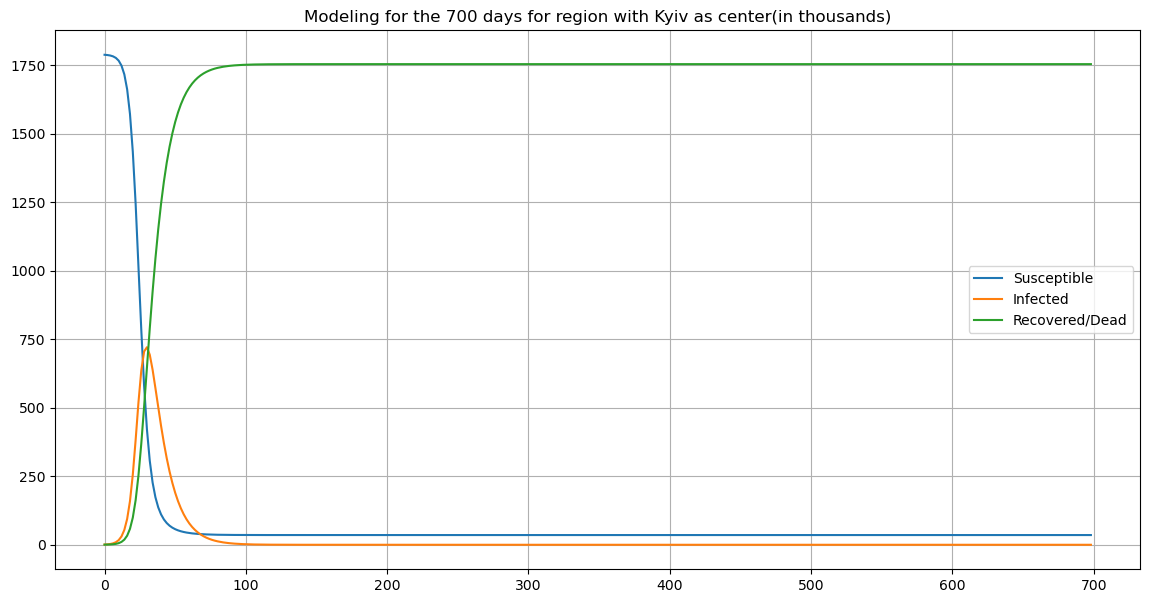

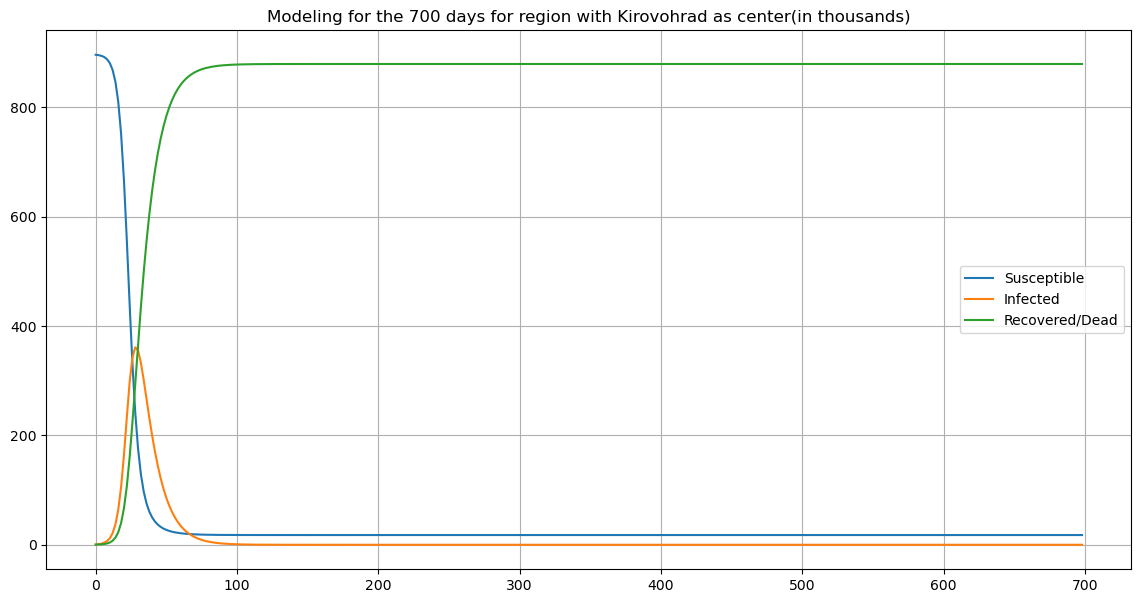

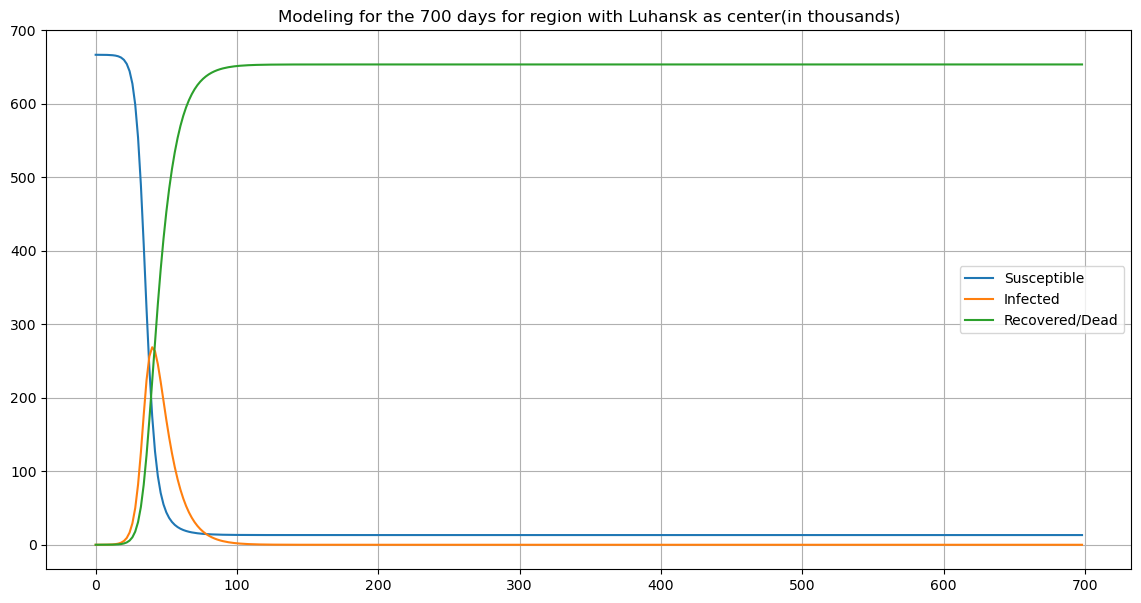

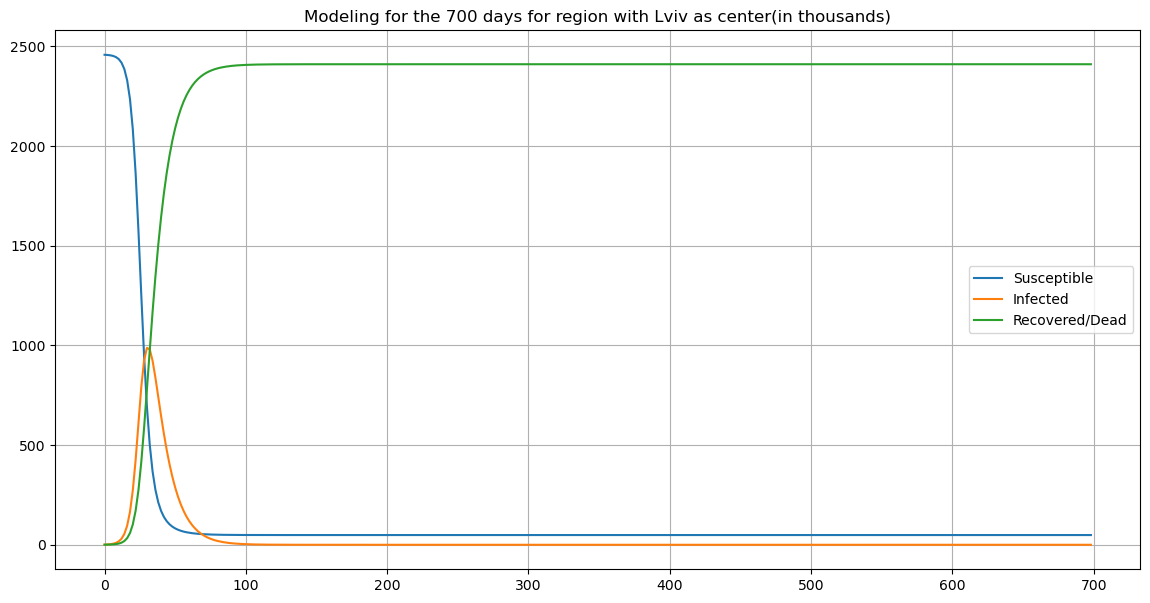

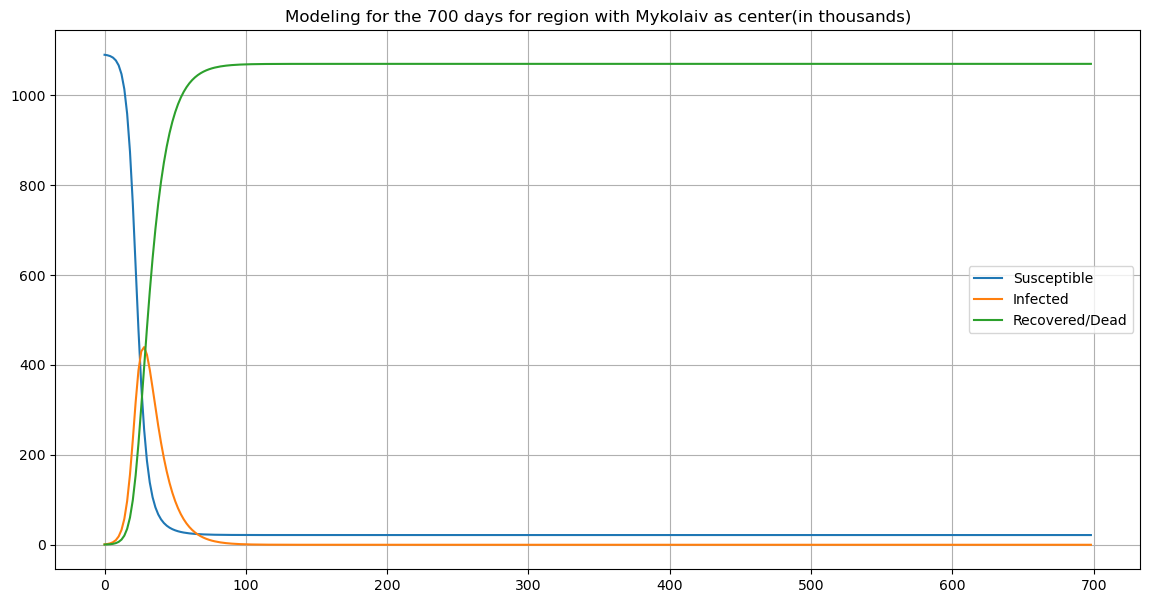

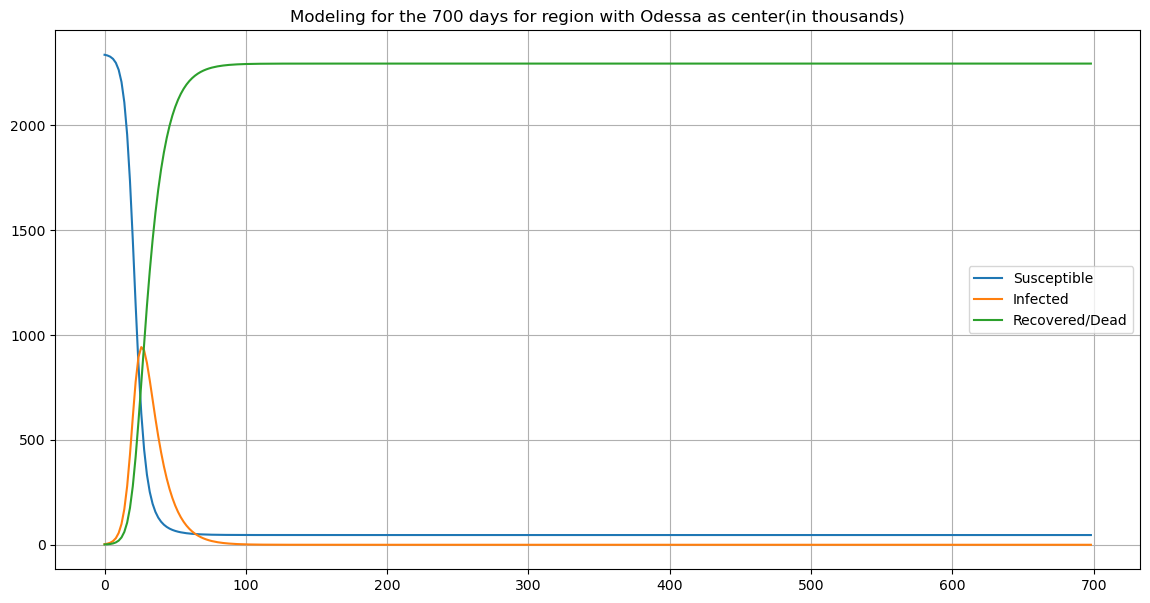

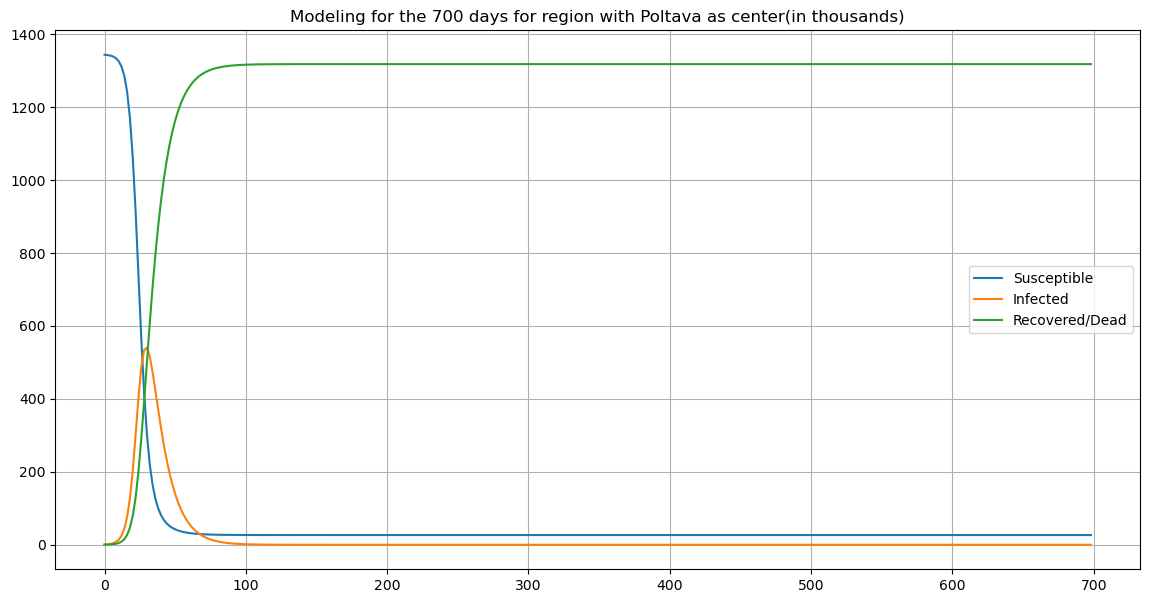

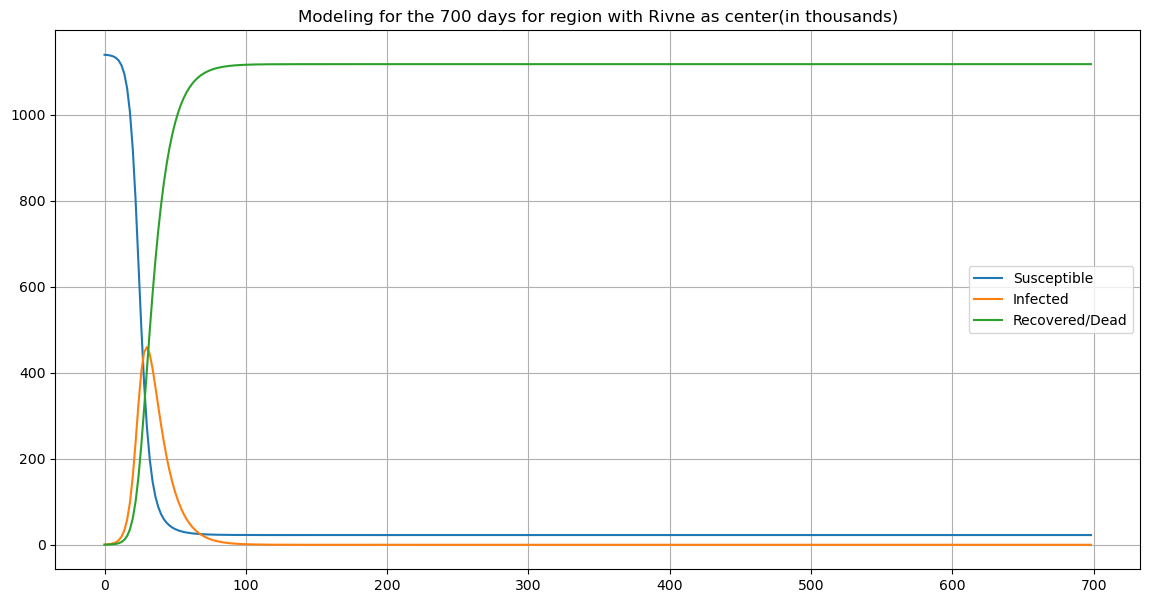

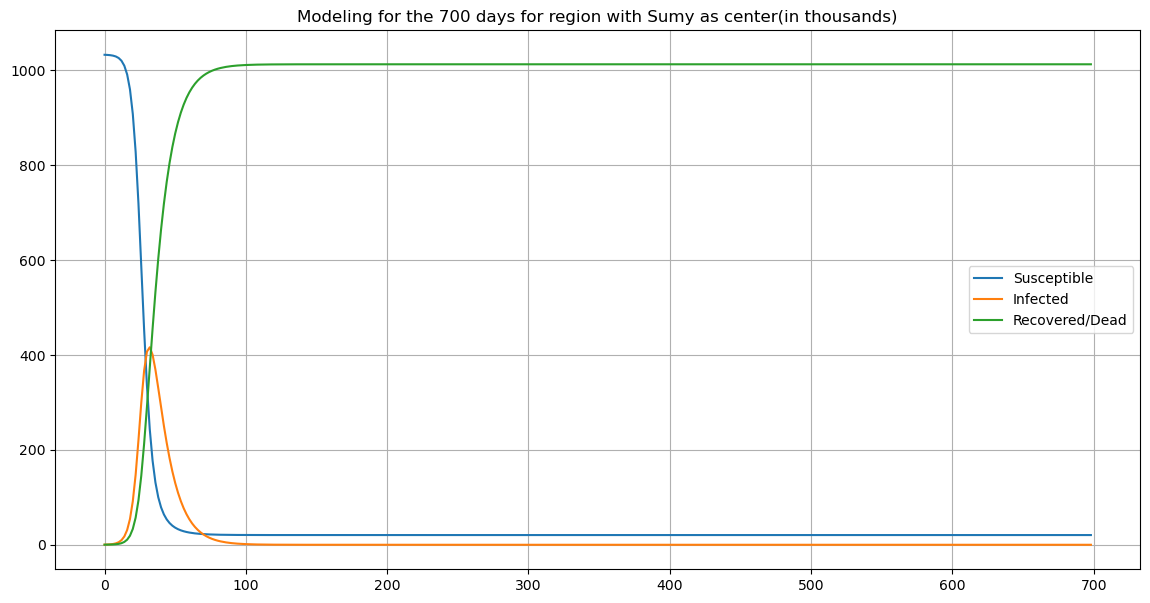

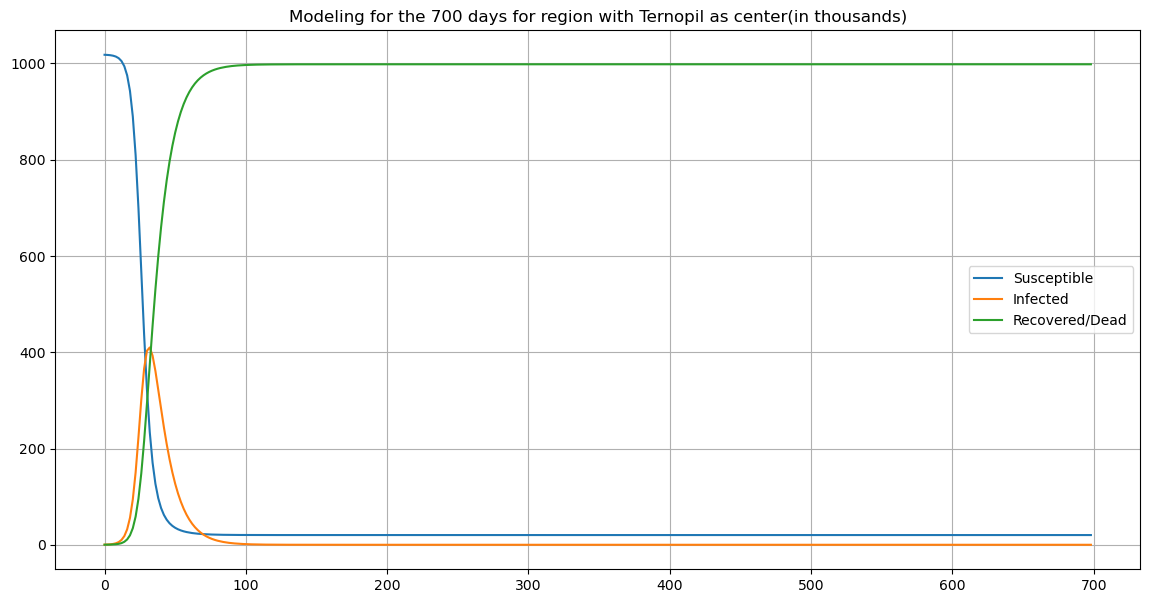

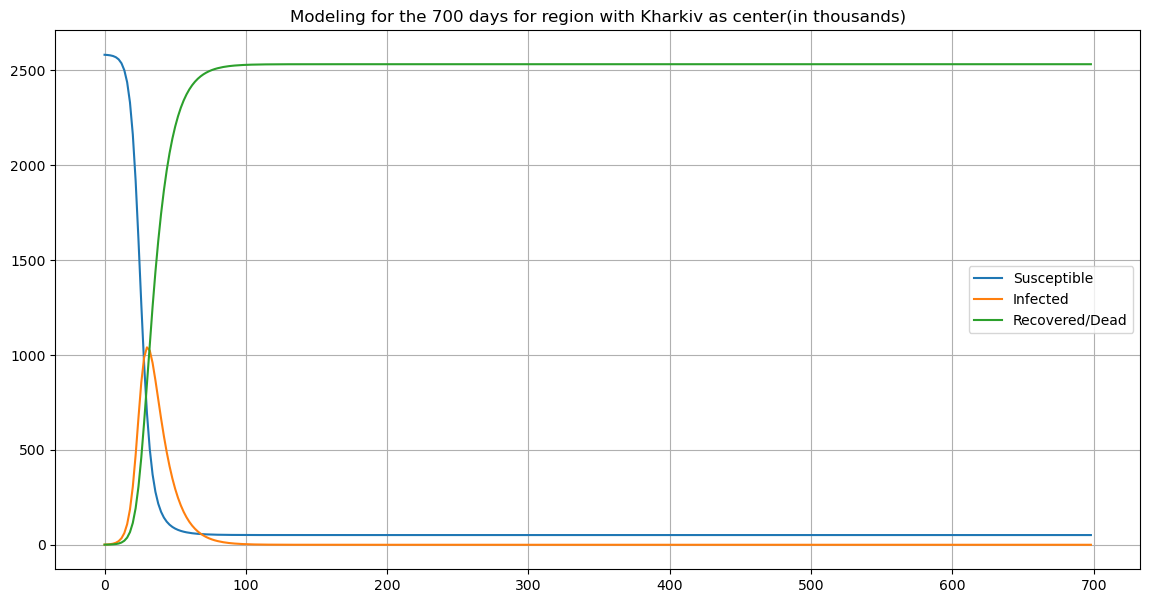

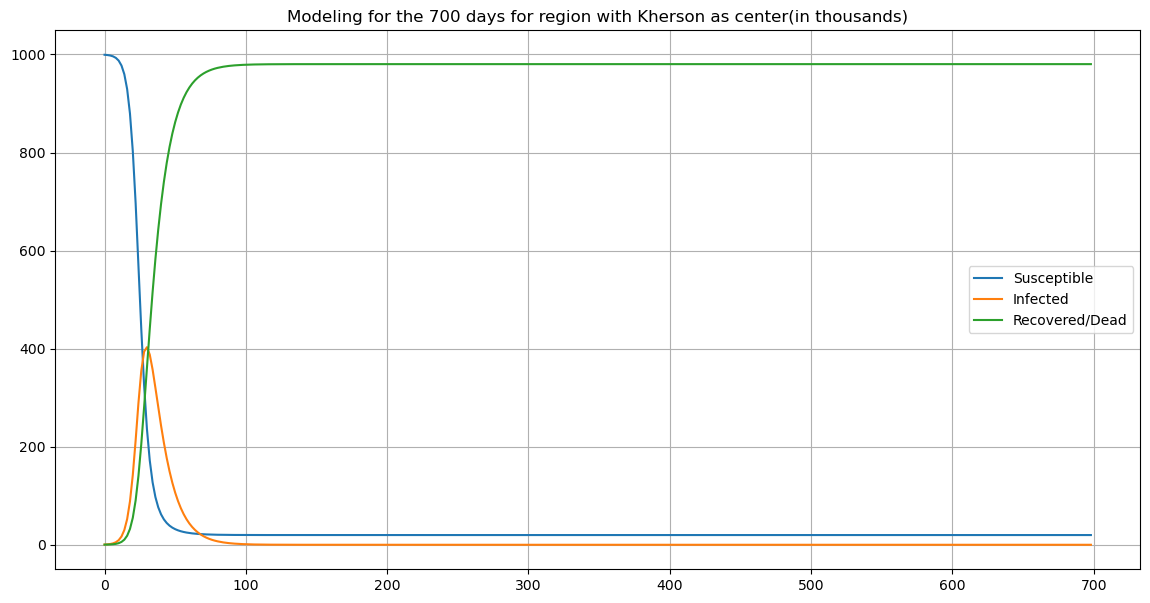

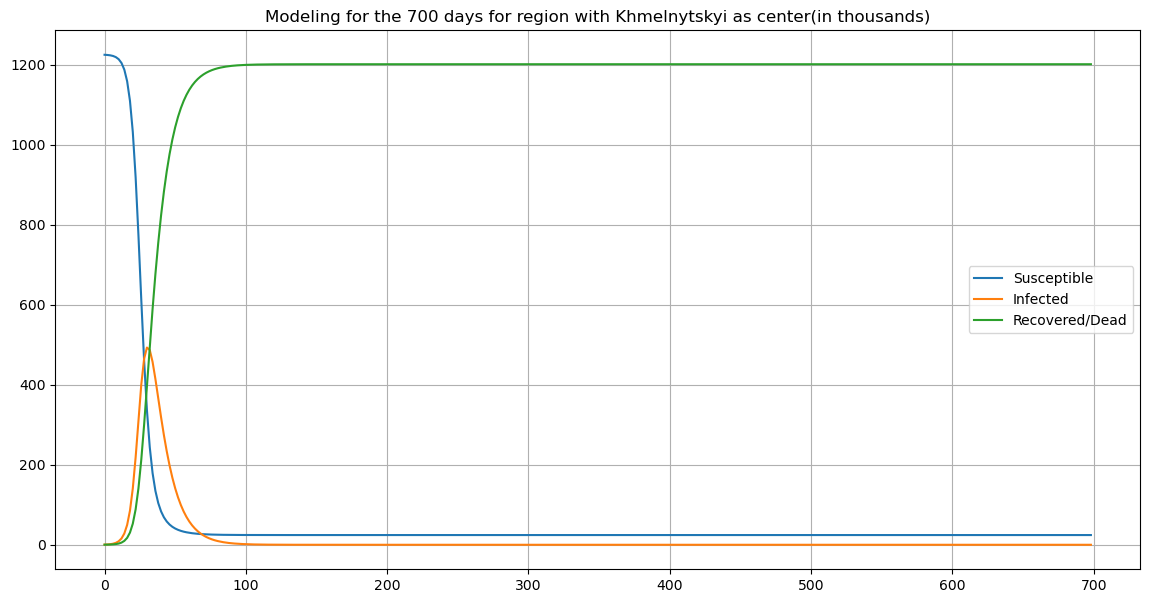

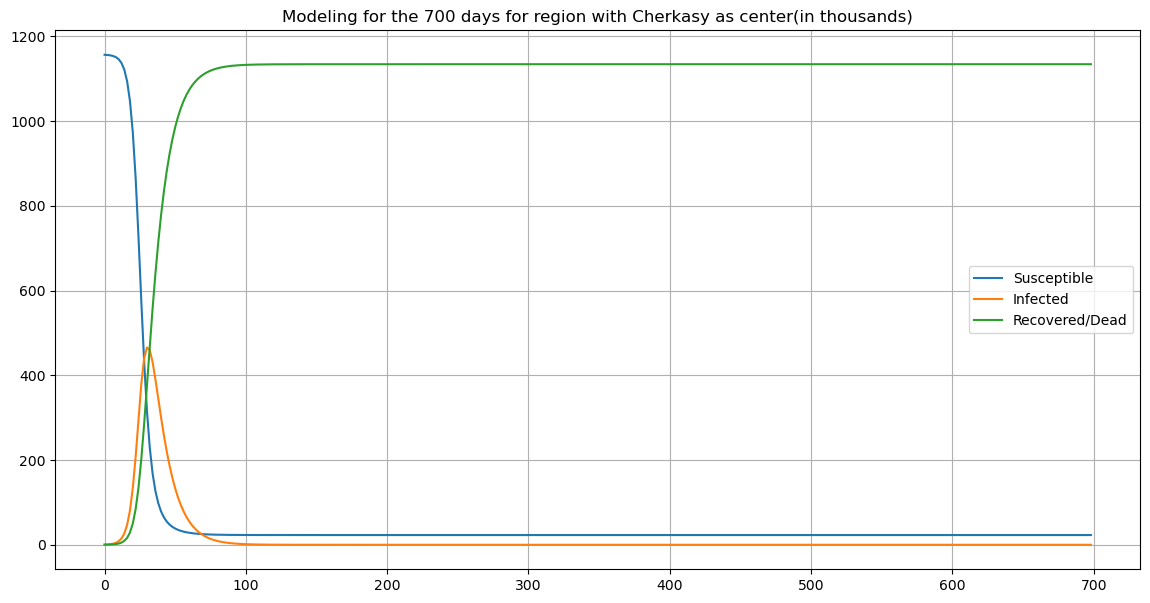

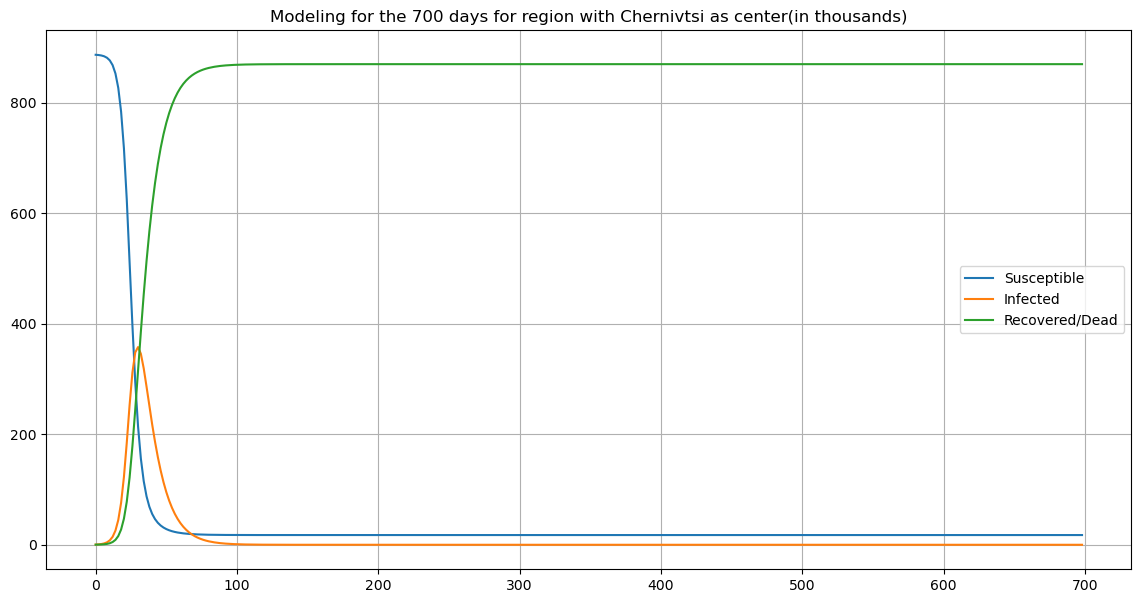

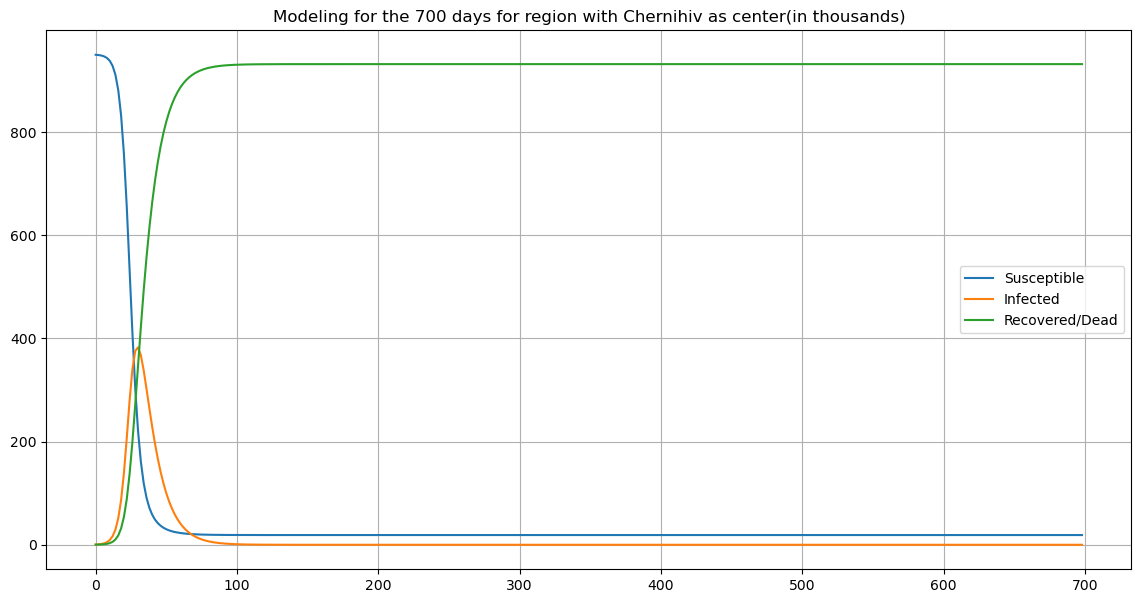

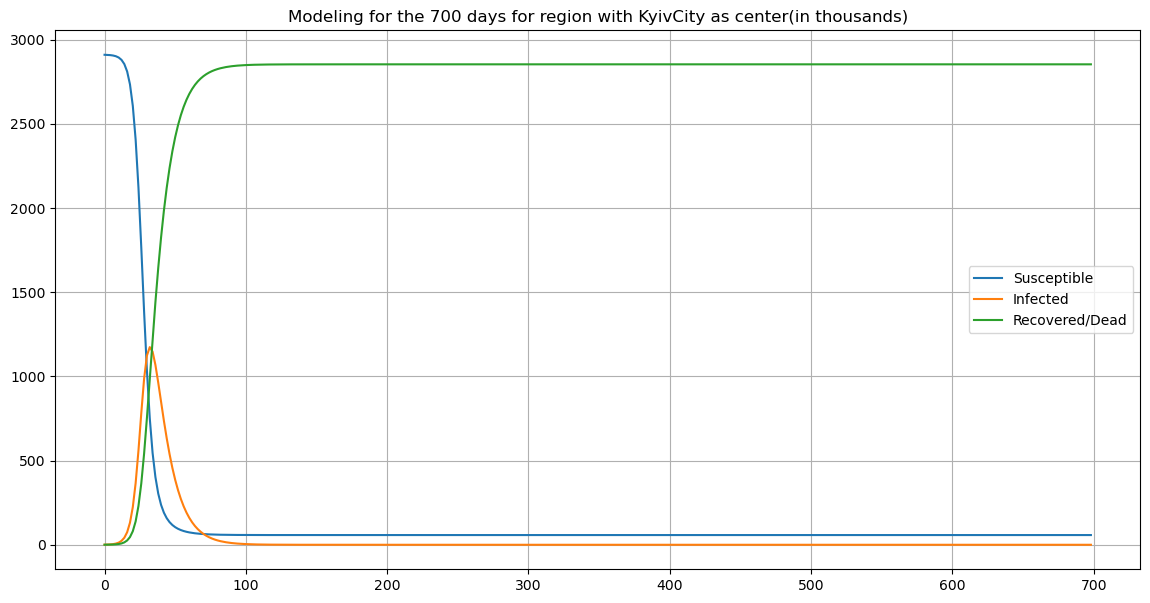

In [24]:
unique_regions = df_sir['Region'].unique()
infection_rates_precent = []
infection_rates_region = []

for region in unique_regions[1:]:
    decoded_region = label_encoder_region.inverse_transform([int(region)])
    selected_row = df_sir.loc[(df_sir['Region'] == region) & (df_sir['Year'] == 2022)]
    result = run_for_region(decoded_region[0], selected_row['TotalPopulation'].values[0], selected_row['InfectedTB'].values[0], selected_row['RecoveredTB'].values[0], selected_row['DeadTB'].values[0], 700)
    infection_rates_precent.append(result[1])
    infection_rates_region.append(result[0])

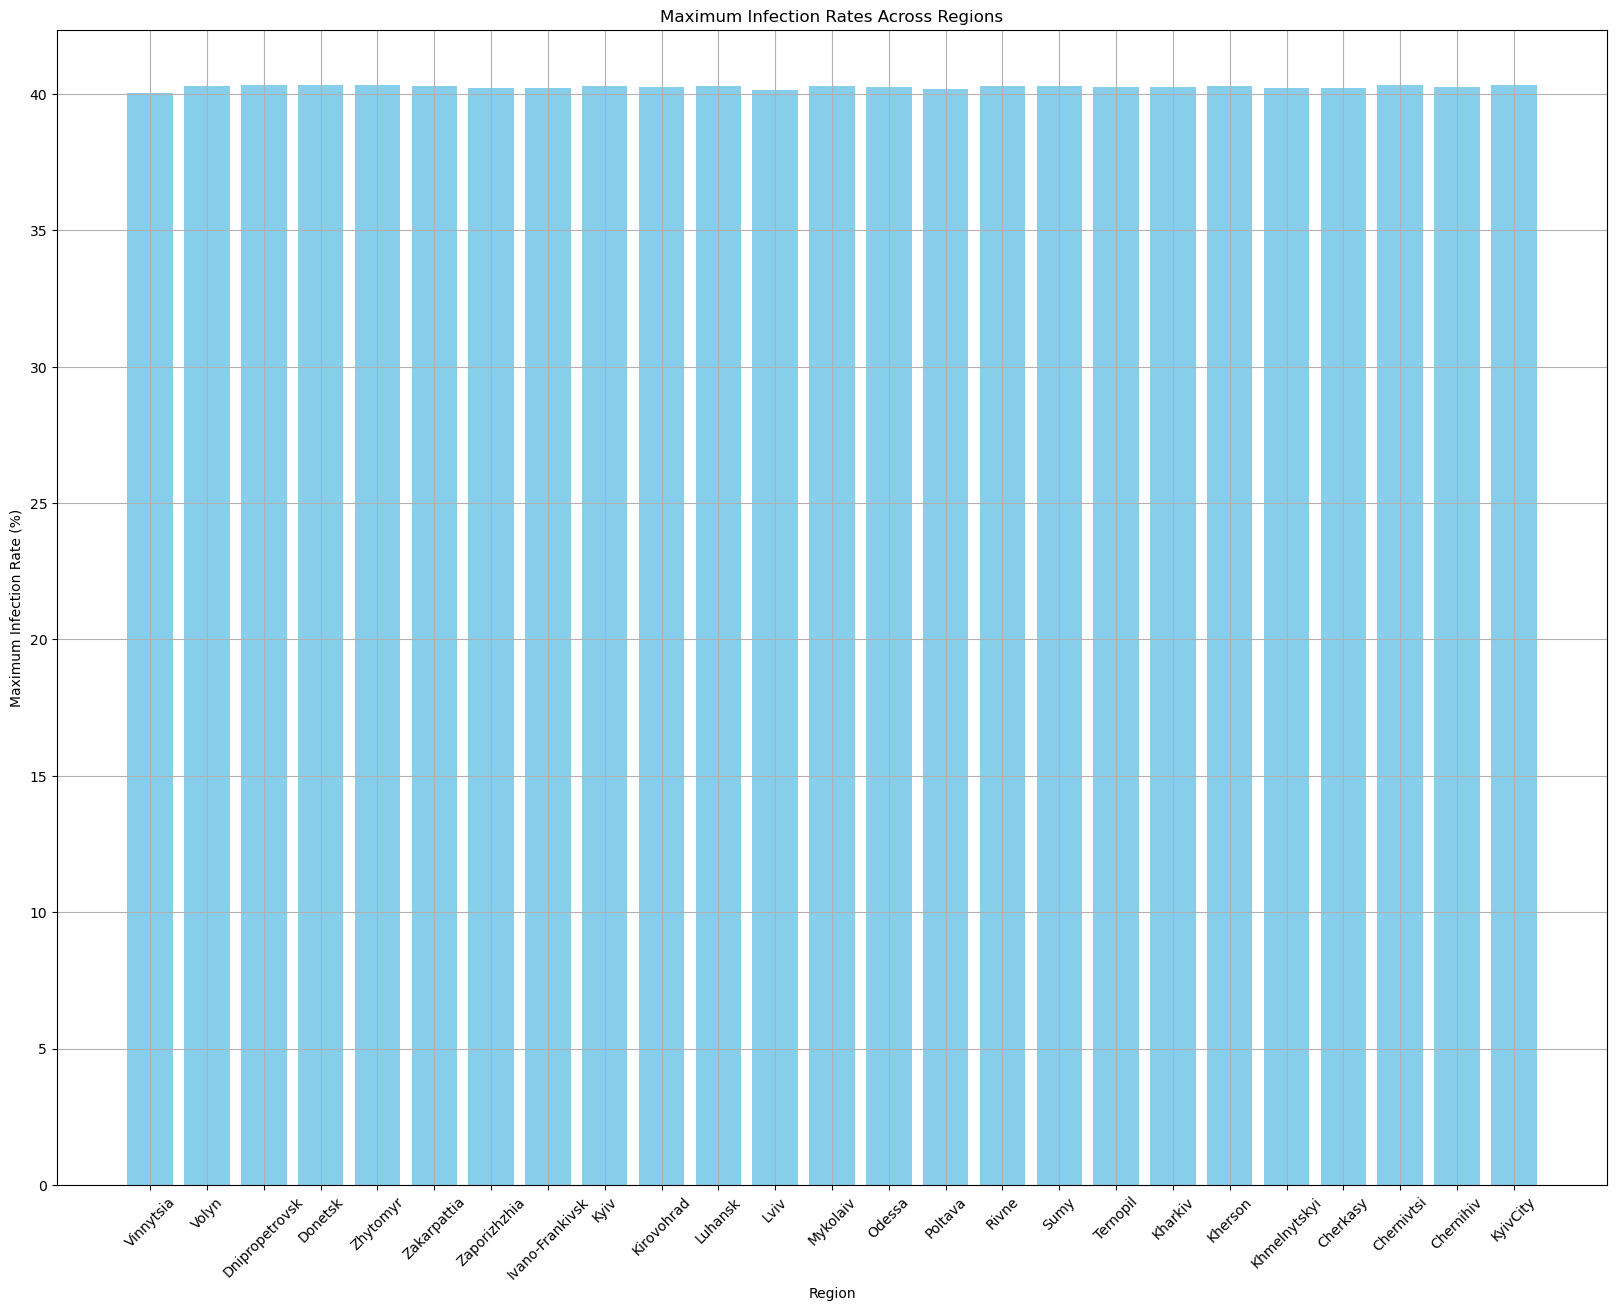

In [26]:
# Plot histogram
plt.figure(figsize=(20, 15))
plt.bar(infection_rates_region, infection_rates_precent, color='skyblue')
plt.title('Maximum Infection Rates Across Regions')
plt.xlabel('Region')
plt.ylabel('Maximum Infection Rate (%)')

# Rotate region names on X-axis by 45 degrees
plt.xticks(rotation=45)

plt.grid(True)
plt.show()